# Classification

In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, plot_confusion_matrix, get_scorer
from sklearn.model_selection import train_test_split, cross_validate, validation_curve, LeaveOneOut


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
X, y = load_iris(as_frame=True, return_X_y=True)

In [3]:
ProfileReport(pd.concat([X,y]))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [27]:
def evalCandidate(model, X_train, y_train, X_test = None, y_test = None, metric='accuracy', cv= LeaveOneOut()):
    print(type(model).__name__)
    scores = cross_validate(model, X_train, y_train, scoring=metric, return_estimator=True, return_train_score=True, cv=cv)
    best_estimator = scores["estimator"][np.argmax(scores["test_score"])]
    del scores["estimator"]
    scores = pd.DataFrame(scores)
    if X_test is not None and y_test is not None:
        scorer = get_scorer(metric)
        y_pred = best_estimator.predict(X_test)
        scores["hold-out scores"] = scorer(best_estimator, X_test, y_test)
        report = classification_report(y_test, y_pred)
        confusion_matrix = plot_confusion_matrix(best_estimator, X_test, y_test)
    else:
        report = None
        confusion_matrix = plot_confusion_matrix(best_estimator, X_train, y_train)
    return scores.describe().iloc[1:3, 2:], report, confusion_matrix

Due to the small dataset size, leave one out cv is done to provide a more robust measure of model performance.

### KNN

KNeighborsClassifier


test_score  train_score  hold-out scores
mean    0.950000     0.950420              1.0
std     0.218859     0.003678              0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



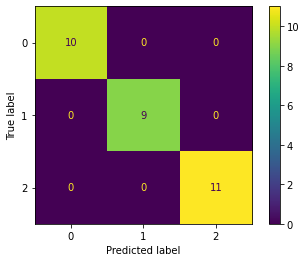

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
scores, report, confusion_matrix = evalCandidate(knn, X_train, y_train, X_test, y_test)

display(scores)
print(report)

/home/tiencheng/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 10) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


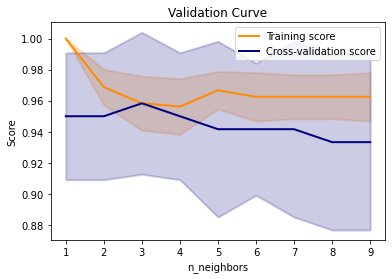

In [7]:
param_range = range(1, 10)
train_scores, test_scores = validation_curve(knn, X_train, y_train, 'n_neighbors', param_range, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### Naive Bayes

GaussianNB


test_score  train_score  hold-out scores
mean    0.941667     0.949160              1.0
std     0.235355     0.002635              0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



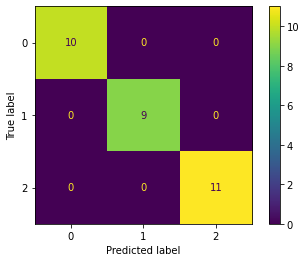

In [8]:
nb = GaussianNB()
scores, report, confusion_matrix = evalCandidate(nb, X_train, y_train, X_test, y_test)

display(scores)
print(report)

### Logistic Regression


LogisticRegression


test_score  train_score  hold-out scores
mean    0.966667     0.973669              1.0
std     0.180258     0.003256              0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



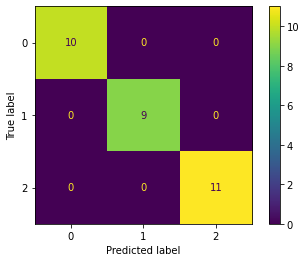

In [9]:
lr = LogisticRegression(solver='newton-cg')
scores, report, confusion_matrix = evalCandidate(lr, X_train, y_train, X_test, y_test)

display(scores)
print(report)

Logistic Regression appears to overfit slightly, however it performs better on the CV set as compared to the previous models

### Classification Tree

DecisionTreeClassifier


test_score  train_score  hold-out scores
mean    0.941667          1.0              1.0
std     0.235355          0.0              0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



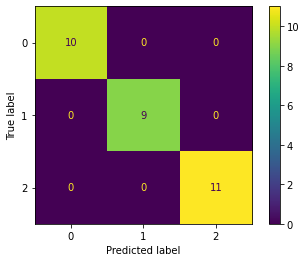

In [10]:
cart = DecisionTreeClassifier()
scores, report, confusion_matrix = evalCandidate(cart, X_train, y_train, X_test, y_test)

display(scores)
print(report)


The Decision Tree exhibits low bias, but suffers from overfitting.

### Support Vector Machine

SVC


test_score  train_score  hold-out scores
mean    0.950000     0.973039              1.0
std     0.218859     0.003757              0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



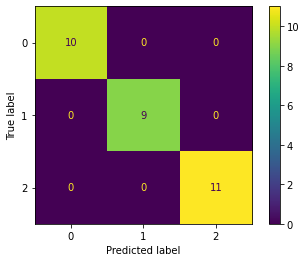

In [11]:
svm = SVC()
scores, report, confusion_matrix = evalCandidate(svm, X_train, y_train, X_test, y_test)

display(scores)
print(report)


## Blood Transfusion Dataset

In [12]:
blood_df = pd.read_csv("transfusion.data")
blood_df

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
..                ...                ...                    ...   
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  
0               98                                           1  
1               28                                           1  
2               35                                           1  
3               45                                           1  
4               77                                           0  
..             ...                                         ...  
743             38                                           0  
744             52                                           0  
745             62                                           0  
746             39                                           0  
747             72                                           0  

[748 rows x 5 columns]

In [19]:
X, y = blood_df.iloc[:, :-1], blood_df.iloc[:, -1]

In [20]:
ProfileReport(blood_df)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogisticRegression


test_score  train_score  hold-out scores
mean    0.777633     0.778852         0.753333
std     0.018607     0.010767         0.000000

              precision    recall  f1-score   support

           0       0.76      0.97      0.86       113
           1       0.50      0.08      0.14        37

    accuracy                           0.75       150
   macro avg       0.63      0.53      0.50       150
weighted avg       0.70      0.75      0.68       150



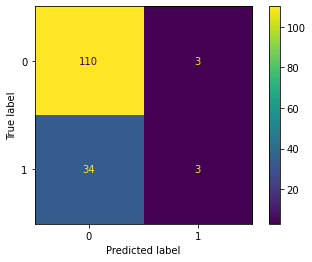

In [35]:
lr = LogisticRegression()
scores, report, confusion_matrix = evalCandidate(lr, X_train, y_train, X_test, y_test, cv = 5)

display(scores)
print(report)

DecisionTreeClassifier


test_score  train_score  hold-out scores
mean    0.740798     0.943985             0.74
std     0.016727     0.009364             0.00

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       113
           1       0.46      0.32      0.38        37

    accuracy                           0.74       150
   macro avg       0.63      0.60      0.61       150
weighted avg       0.72      0.74      0.72       150



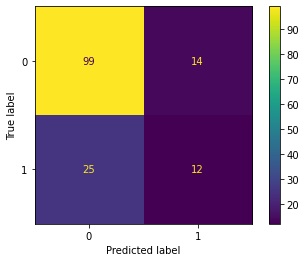

In [36]:
dt = DecisionTreeClassifier()
scores, report, confusion_matrix = evalCandidate(dt, X_train, y_train, X_test, y_test, cv = 5)

display(scores)
print(report)

SVC


test_score  train_score  hold-out scores
mean    0.780938     0.793484         0.766667
std     0.022315     0.007405         0.000000

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.62      0.14      0.22        37

    accuracy                           0.77       150
   macro avg       0.70      0.55      0.54       150
weighted avg       0.74      0.77      0.70       150



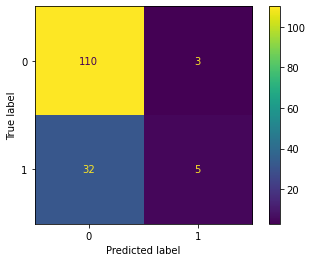

In [37]:
svm = SVC()
scores, report, confusion_matrix = evalCandidate(svm, X_train, y_train, X_test, y_test, cv = 5)

display(scores)
print(report)

## Regression

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor